In [2]:
# Import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# cambiar la notación científica por otra más natural
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
# Leer los datos y eliminar las columnas no necesarias
df = pd.read_csv('../input/movies/movies.csv', encoding = "ISO-8859-1")
df.drop(['director', 'star', 'writer'], axis=1, inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00


In [4]:
# Primera observación de la columna objetivo (gross, recaudación)

# Si ordenamos de menor a mayor vemos que hay recaudaciones sin registar (NaN)
df.sort_values(by='gross', ascending=False, na_position='first')

,name,rating,genre,year,released,score,votes,country,budget,gross,company,runtime
27,Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.00,"4,100.00",United Kingdom,"36,000,000.00",NaN,ITC Films,115.00
41,Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.90,"13,000.00",Australia,NaN,NaN,The South Australian Film Corporation,107.00
47,The Boogey Man,R,Horror,1980,"November 7, 1980 (United States)",4.60,"3,900.00",United States,"300,000.00",NaN,The Jerry Gross Organization,82.00
49,Lion of the Desert,PG,Biography,1980,"May 16, 1981 (Japan)",8.30,"15,000.00",Libya,"35,000,000.00",NaN,Falcon International Productions,173.00
52,Can't Stop the Music,PG,Biography,1980,"June 20, 1980 (United States)",4.20,"3,700.00",United States,"20,000,000.00",NaN,EMI Films,124.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.50,"5,200.00",United Kingdom,NaN,"1,400.00",British Broadcasting Corporation (BBC),103.00
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.70,320.00,United States,NaN,790.00,Visual Arts Entertainment,104.00
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.20,735.00,United States,NaN,682.00,Roxwell Films,93.00
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.30,"5,100.00",Japan,"11,900,000.00",596.00,DENTSU Music And Entertainment,134.00


count               7,479.00
mean           78,500,541.02
std           165,725,124.32
min                   309.00
25%             4,532,055.50
50%            20,205,757.00
75%            76,016,691.50
max         2,847,246,203.00
Name: gross, dtype: float64

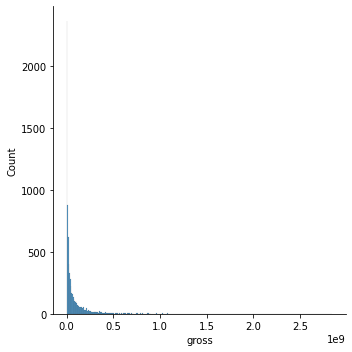

In [5]:
# Estas filas se deberán eliminar, ya que no podemos evaluar el objetivo con ellas (189 de 7668)
movies = df[df['gross'].notnull()]

# en una gráfica sencilla podemos ver que hay muchas películas con poca recaudación y pocas con mucho
sns.displot(movies['gross']) 
movies['gross'].describe() # información gneneral de los datos de recaudación

In [6]:
# Analizamos las primeras cuestiones

# 1. ¿En qué género debería enfocarme?
movies['genre'].value_counts()  # hay 18 géneros distintos

Comedy       2192
Action       1673
Drama        1468
Crime         542
Biography     433
Adventure     420
Animation     335
Horror        307
Fantasy        43
Mystery        20
Thriller       12
Family         11
Sci-Fi          8
Romance         8
Western         3
Musical         2
Music           1
Sport           1
Name: genre, dtype: int64

<AxesSubplot:xlabel='gross', ylabel='genre'>

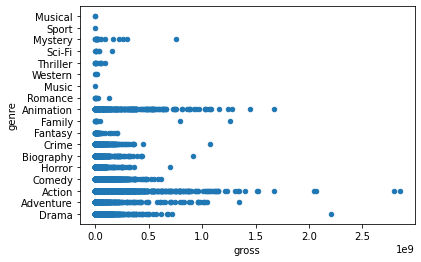

In [7]:
movies.plot.scatter(x='gross', y='genre')

In [8]:
# selecionamos de la tabla las columnas de género y recaudación
genero = movies[['genre', 'gross']]
genero

,genre,gross
0,Drama,"46,998,772.00"
1,Adventure,"58,853,106.00"
2,Action,"538,375,067.00"
3,Comedy,"83,453,539.00"
4,Comedy,"39,846,344.00"
...,...,...
7653,Crime,"3,661.00"
7655,Animation,"240,663,149.00"
7656,Comedy,"413,378.00"
7657,Drama,"25,818,882.00"


,media,mediana
genre,,
Action,"145,508,580.85","51,386,477.00"
Adventure,"109,325,230.22","27,989,799.00"
Animation,"239,229,987.45","139,804,348.00"
Biography,"47,874,322.87","18,598,607.00"
Comedy,"44,331,874.30","16,373,597.00"
Crime,"39,401,196.17","12,239,344.50"
Drama,"38,930,959.49","8,463,058.50"
Family,"196,172,492.45","9,979,683.00"
Fantasy,"38,709,328.72","19,595,031.00"


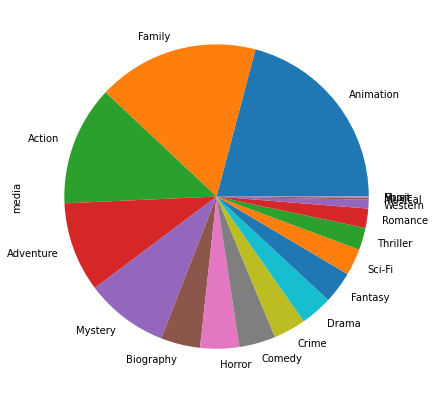

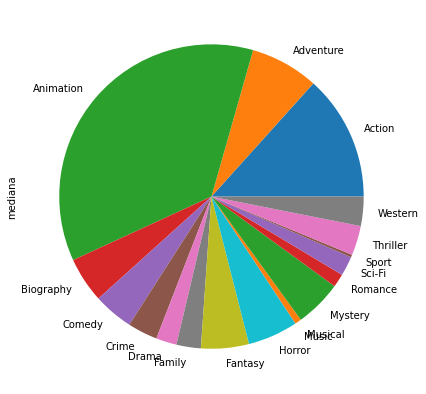

In [16]:
#  agrupando la recuadación por género con su media y mediana
medias = genero.groupby('genre').agg(media=('gross', 'mean'), mediana=('gross', 'median'))

medias.sort_values('media', ascending=False).plot.pie(y='media',  figsize=(7, 7), legend=False)
medias.sort_values('mediana', ascending=False).plot.pie(y='mediana',  figsize=(7, 7), legend=False)
medias

In [ ]:
# Observando los datos de la mediana de cada categoría, las más altas son Animación, Acción y Aventura

In [10]:
# Es más apropiado tomar la mediana, con la media si un valor único es muy alto
# El género Familia solo tiene 11 pelíulas, pero tiene la segunda media más alta.
movies[movies['genre'] == 'Family']
# la bella y la bestia tiene una gran recaudación, haciendo que la media suba tanto

,name,rating,genre,year,released,score,votes,country,budget,gross,company,runtime
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.30,"5,700.00",United States,NaN,"5,000,000.00",Walt Disney Productions,84.00
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.80,"381,000.00",United States,"10,500,000.00","792,910,554.00",Universal Pictures,115.00
723,D.A.R.Y.L.,PG,Family,1985,"June 14, 1985 (United States)",6.30,"12,000.00",United Kingdom,NaN,"7,840,873.00",Paramount Pictures,99.00
798,One Magic Christmas,G,Family,1985,"November 22, 1985 (United States)",6.50,"3,400.00",Canada,NaN,"13,677,222.00",Walt Disney Pictures,89.00
1029,Nutcracker,G,Family,1986,"November 26, 1986 (United States)",7.20,"1,000.00",United States,NaN,"781,727.00",Hyperion Pictures,89.00
2433,The Nutcracker,G,Family,1993,"November 24, 1993 (United States)",5.90,"1,900.00",United States,"19,000,000.00","2,119,994.00",Krasnow Productions,92.00
2554,Miracle on 34th Street,PG,Family,1994,"November 18, 1994 (United States)",6.50,"33,000.00",United States,NaN,"46,264,384.00",Twentieth Century Fox,114.00
2597,Lassie,PG,Family,1994,"July 22, 1994 (United States)",5.90,"5,400.00",United States,NaN,"9,979,683.00",Broadway Pictures,94.00
4569,Raise Your Voice,PG,Family,2004,"October 8, 2004 (United States)",5.90,"27,000.00",United States,"15,000,000.00","14,867,514.00",New Line Cinema,103.00
7072,Beauty and the Beast,PG,Family,2017,"March 17, 2017 (United States)",7.10,"283,000.00",United States,"160,000,000.00","1,264,434,525.00",Mandeville Films,129.00


<AxesSubplot:xlabel='score', ylabel='gross'>

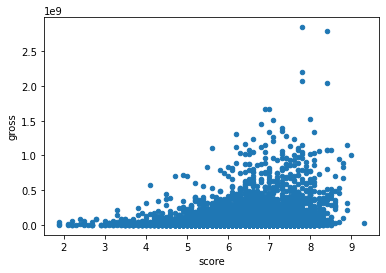

In [13]:
# 
# 2. IMDB alto respecto a los ingresos?
movies.plot.scatter(x='score', y='gross')
# Solo observando la gráfica, la mayoría de las peliculas se encuentran en el intervalo entre el 6.5 y el 8.5

In [21]:
# Seleccionamos las columnas de nota y recaudación
imdb = movies[['score', 'gross']]
# Agrupamos por intervalo de 0.5 de nota y calculamos la mediana de cada intervalo
imdbGrouped = imdb.groupby(pd.cut(imdb['score'], np.arange(1.5, 10, 0.5))).median()
imdbGrouped

,score,gross
score,,
"(1.5, 2.0]",1.90,"9,448,644.00"
"(2.0, 2.5]",2.30,"7,266,209.00"
"(2.5, 3.0]",2.90,"3,650,275.00"
"(3.0, 3.5]",3.40,"12,218,638.00"
"(3.5, 4.0]",3.80,"10,155,690.00"
"(4.0, 4.5]",4.40,"11,665,465.00"
"(4.5, 5.0]",4.80,"13,203,358.50"
"(5.0, 5.5]",5.30,"16,554,699.00"
"(5.5, 6.0]",5.80,"18,133,495.00"


,name,rating,genre,year,released,score,votes,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.30,"2,400,000.00",United States,"25,000,000.00","28,817,291.00",Castle Rock Entertainment,142.00
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.00,"2,400,000.00",United States,"185,000,000.00","1,005,973,645.00",Warner Bros.,152.00


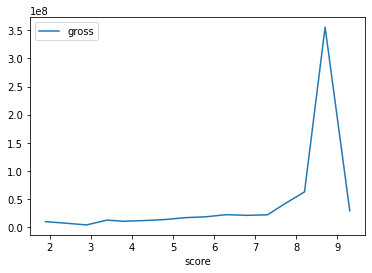

In [23]:
imdbGrouped.plot(x='score', y='gross')
#la observacion que se puede extraer es que a mayor nota mayor recaudación hasta llegar al 9, que apenas hay peliculas
movies[movies['score'] > 8.9]

In [60]:
#
# 3. Mejor producir una peli para todos o solo para adultos? Rating 
movies['rating'].groupby(movies['rating']).count()

rating
Approved        1
G             152
NC-17          23
Not Rated     259
PG           1222
PG-13        2091
R            3613
TV-14           1
TV-MA           9
TV-PG           4
Unrated        47
X               3
Name: rating, dtype: int64

In [24]:
# Añadimos nueva columna con los valores de rating agrupados por edad permitida: infantil, intermedio, adultos, nc
           
movies = df[df['gross'].notnull()]         
movies2 = movies.copy()
movies2.loc[movies['rating'].isin(['Approved', 'G', 'PG', 'TV-PG']), 'edad'] = 'infantil'
movies2.loc[movies['rating'].isin(['PG-13', 'PG-14', 'TV-14']), 'edad'] = 'intermedio'
movies2.loc[movies['rating'].isin(['NC-17', 'R', 'TV-MA', 'X']), 'edad'] = 'adultos'
movies2.loc[movies['rating'].isin(['Not Rated', 'Unrated']), 'edad'] = 'nc'
movies2.loc[movies['rating'].isna(), 'edad'] = 'nc'

movies2 #Edad

,name,rating,genre,year,released,score,votes,country,budget,gross,company,runtime,edad
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,adultos
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,adultos
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,infantil
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,infantil
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.40,"2,400.00",United States,NaN,"3,661.00",Prowess Pictures,98.00,adultos
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.60,"1,300.00",China,NaN,"240,663,149.00",Beijing Enlight Pictures,110.00,infantil
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.00,294.00,United States,NaN,"413,378.00",Pryor Entertainment,120.00,intermedio
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.70,903.00,China,NaN,"25,818,882.00",NaN,135.00,nc


<AxesSubplot:xlabel='edad'>

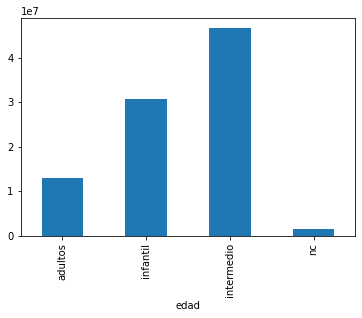

In [27]:
# Agrupando los datos por grupo de edad
edadgrouped = movies2.groupby(movies2['edad']).median()
edadgrouped['gross'].plot.bar()
# las no adultas tienen muchos más beneficios

In [38]:
##################################################################################################

# Para evaluar otras posibles variables, selecciono las columnas que puedan ser relevantes.
# Y eliminar las que circunstancialmente no puedan ser útiles, como año o pais (a no ser que la productora pueda cambiar de país) 
movies3 = movies2[['gross', 'genre', 'year', 'score', 'votes', 'budget', 'company', 'runtime', 'edad']]
movies3.describe()

,gross,year,score,votes,budget,runtime
count,"7,479.00","7,479.00","7,479.00","7,479.00","5,436.00","7,478.00"
mean,"78,500,541.02","2,000.66",6.40,"90,147.32","35,938,637.62",107.44
std,"165,725,124.32",11.05,0.96,"164,806.81","41,547,704.90",18.51
min,309.00,"1,980.00",1.90,34.00,"6,000.00",63.00
25%,"4,532,055.50","1,991.00",5.80,"9,900.00","10,000,000.00",95.00
50%,"20,205,757.00","2,001.00",6.50,"34,000.00","21,000,000.00",104.00
75%,"76,016,691.50","2,010.00",7.10,"96,000.00","45,000,000.00",116.00
max,"2,847,246,203.00","2,020.00",9.30,"2,400,000.00","356,000,000.00",366.00


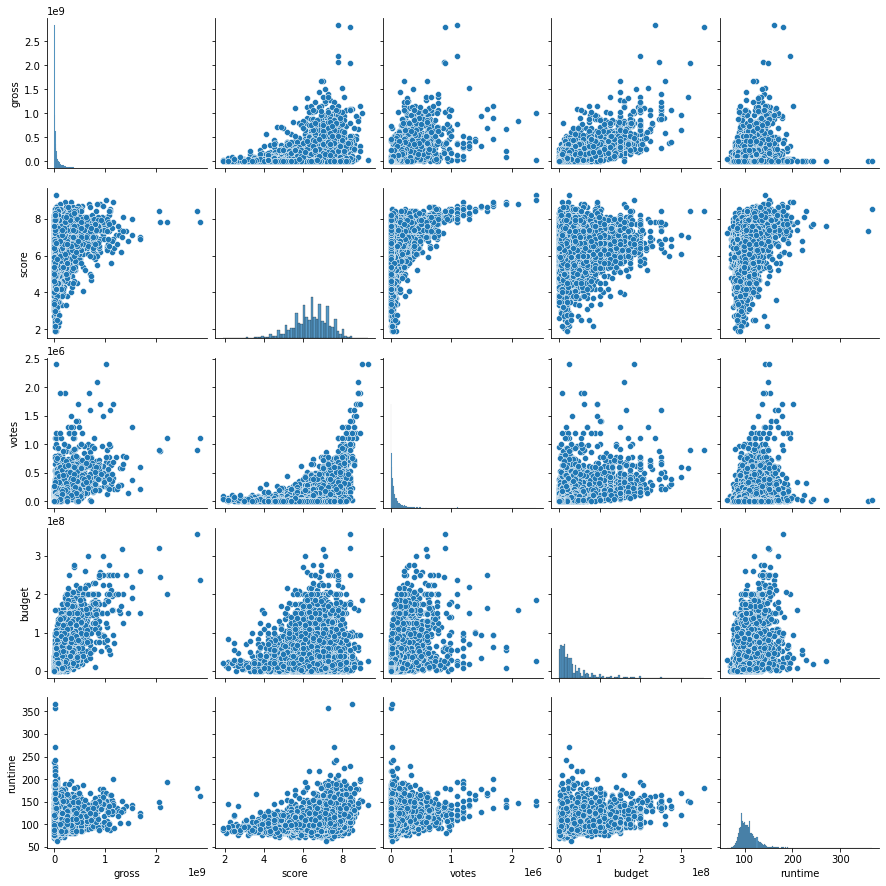

In [37]:
# diagramas entre las variables numéricas, puede ayudar a encontrar alguna relación
cols = ['gross', 'genre', 'score', 'votes', 'budget', 'runtime', 'edad']
sns.pairplot(movies3[cols])
plt.show()

<AxesSubplot:xlabel='runtime'>

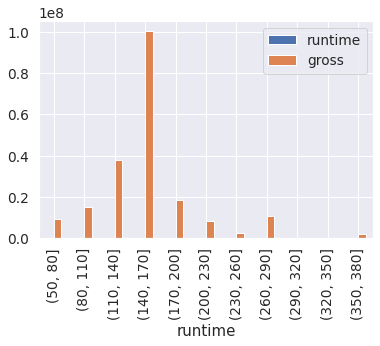

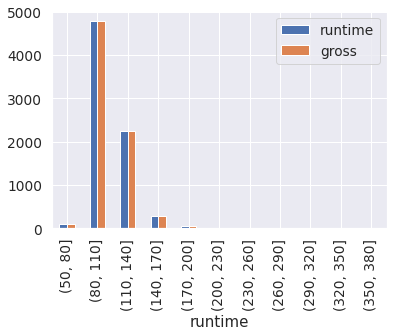

In [63]:
# Otra variable individual que se podría considerar es Runtime, o duración de la película 
movies3[['runtime', 'gross']].groupby(pd.cut(movies3['runtime'], np.arange(50, 400, 30))).median().plot.bar()
movies3[['runtime', 'gross']].groupby(pd.cut(movies3['runtime'], np.arange(50, 400, 30))).count().plot.bar()
# la mayor recaudación se da entre los 110 y 170 minutos, que también es el intervalo donde hay mayor pelis 

In [96]:
# ¿las pelis que se estrenan en pais donde no son?
movies2[['released', 'country', 'gross']]
# al ser los datos obtenidos de imdb, muchas veces la fecha de estreno de referencia es la de eeuu
movies2[movies2['country'] != 'United States'][['name', 'released', 'country', 'gross']]

,name,released,country,gross
0,The Shining,"June 13, 1980 (United States)",United Kingdom,"46,998,772.00"
11,The Gods Must Be Crazy,"October 26, 1984 (United States)",South Africa,"30,031,783.00"
20,Cruising,"February 15, 1980 (United States)",West Germany,"19,814,523.00"
31,Prom Night,"July 18, 1980 (United States)",Canada,"14,796,236.00"
44,The Awakening,"October 31, 1980 (United States)",United Kingdom,"8,415,112.00"
...,...,...,...,...
7646,The Invisible Man,"February 28, 2020 (United States)",Canada,"143,151,000.00"
7651,The Call of the Wild,"February 21, 2020 (United States)",Canada,"111,105,497.00"
7652,The Eight Hundred,"August 28, 2020 (United States)",China,"461,421,559.00"
7655,Legend of Deification,"October 1, 2020 (United States)",China,"240,663,149.00"


<AxesSubplot:xlabel='longitudnombre', ylabel='gross'>

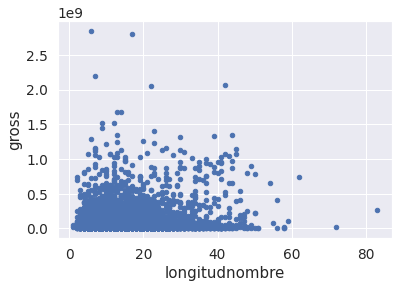

In [97]:
# ¿y la longitud del título?
mov = movies[['name', 'released', 'country', 'gross']].copy()

mov['longitudnombre'] = mov['name'].str.len()
mov.plot.scatter(x='longitudnombre', y='gross')

In [98]:
mov[mov['longitudnombre'] > 55][['name', 'longitudnombre']]

,name,longitudnombre
515,The Adventures of Buckaroo Banzai Across the 8...,58
1628,The Toxic Avenger Part III: The Last Temptatio...,56
2800,The Englishman Who Went Up a Hill But Came Dow...,58
2884,Don't Be a Menace to South Central While Drink...,72
4653,"The Chronicles of Narnia: The Lion, the Witch ...",62
4896,Borat: Cultural Learnings of America for Make ...,83
5100,The Assassination of Jesse James by the Coward...,58
5727,The Chronicles of Narnia: the Voyage of the Da...,56
6594,"Alexander and the Terrible, Horrible, No Good,...",59


In [103]:
# las distintas compañías que hay
movies['company'].value_counts()

Universal Pictures             376
Warner Bros.                   333
Columbia Pictures              332
Paramount Pictures             319
Twentieth Century Fox          240
                              ... 
Joel Castleberg Productions      1
Dinamo Entertainment             1
Lions Gate Entertainment         1
Films de L'Alma                  1
Unison Films                     1
Name: company, Length: 2276, dtype: int64

### 

In [ ]:
# En un análisis no me quedaría únicamente con ver la relación de las variables de manera individual,
# es posible que la combinación de género o rating con compañia sea relevante en los beneficios
# ej, disney no tendrá muchas películas adultas, u otro estudio diferente puede no tener mucha relevancia en las de animación

# Para maximizar el beneficio de una pelicula, también hay que tener en cuenta el presupuesto total disponible.
# Y calcular cuál sería el mejor punto entre apostar por hacer pocas películas de mucho presupuesto con las variables más relevantes
# o muchas más baratas y de más variedad